Source: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

# Load Libraries and Dataset

In [1]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [2]:
# load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
y = array[:,8]


# Comparative Algorithms

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.692584 (0.064104)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


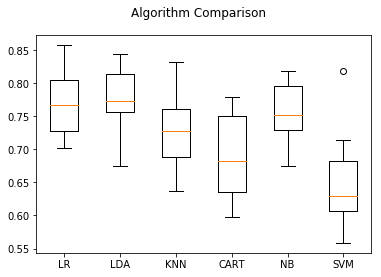

In [3]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Multi Training Classifiers

In [3]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

print(__doc__)

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


Automatically created module for IPython interactive environment


/home/geanderson/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
names = ["Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "GaussianNB"]

In [5]:
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

## Class of Multi Training Classifiers

In [8]:
class Classifiers():
    
    def __init__(self):
        pass
    
    def training(self, X_train, y_train):
        """fitting the traing set in the models"""
        for name, clf in zip(names, classifiers):
            fit = clf.fit(X_train, y_train)
            yield fit
    
    def score (self, X_test, y_test):
        """get the names and scores of the models"""
        for name, results in zip(names, classifiers):
            scored = results.score(X_test, y_test)
            yield name, scored
            
    def score_sorted(self, X_test, y_test):
        """"return the score of each models"""
        for results in classifiers:
            score = results.score(X_test, y_test)
            yield score
    
    def models_sorted(self, names, beta):
        """return the models with name in sorted position by accuracy"""
        modelos = [val for pair in zip(names, sorted(beta, reverse=True)) for val in pair]
        it = iter(modelos)
        for x in it:
            print ("Modelo {} tem score igual a {:.3f}".format(x, next(it)))
            
    def predict(self, names, classifiers, X_train, y_train, X_test):
        """return the predict of the all models trained"""
        for name, prediction in zip(names, classifiers):
            y_pred = prediction.fit(X_train, y_train).predict(X_test)
            yield name, y_pred
    
    def confusion(self, y_test):
        """"return the confusion matrix for models"""
        for conf in a:
            cnf_matrix = confusion_matrix(y_test, conf)
            yield cnf_matrix
            
    def scores_sorted_list():
        """ get the scores of the models sorted"""
        beta = classificadores.score_sorted(X_test, y_test)
        sorted_alarm_list = sorted(list(beta), reverse=True)
        for alarm in sorted_alarm_list:
            print (alarm)
        
    
    
    
            

## Call the Class for Classifiers

In [9]:
classificadores = Classifiers()

## Training the Models

In [22]:
# training the models
training = classificadores.training(X_train, y_train)
print(list(training))

[SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,

## Scores of the Models

In [23]:
# get the scores of the models
alfa = list(classificadores.score(X_test, y_test))
for elem in alfa:
    print(elem)

('Linear SVM', 0.77922077922077926)
('RBF SVM', 0.69480519480519476)
('Decision Tree', 0.75)
('Random Forest', 0.72077922077922074)
('AdaBoost', 0.73376623376623373)
('GaussianNB', 0.74350649350649356)


In [39]:
# get the scores of the models sorted
beta = classificadores.score_sorted(X_test, y_test)
sorted_list = sorted(list(beta), reverse=True)
for i in sorted_list:
    print (i)

0.779220779221
0.75
0.743506493506
0.733766233766
0.720779220779
0.694805194805


In [36]:
sorted_alarm_list[0]

0.77922077922077926

## Prediction of all Models

In [72]:
# get the array of prediction of all models
h = list(classificadores.predict(names, classifiers, X_train, y_train, X_test))


In [76]:
for elem in h:
    print(elem[1])


[ 1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.
  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.
  0.  1.  1.  0.  1.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  0.
  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.
  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0

## Confusion Matrix of All Models

In [ ]:
# return the confusion matrix of all models
j = list(confusion())
for elem in j:
    print(elem)

In [ ]:
# save the model to disk
from sklearn.externals import joblib
joblib.dump(clf, 'model_score.pkl')

# Pipeline Model Improvement 

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split





In [53]:

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()

# ANOVA SVM-C
anova_filter = SelectKBest(f_regression, k=4)
clf = GradientBoostingClassifier(max_features=5)
grid = GridSearchCV(svc, param_grid=)

anova_gbm = Pipeline([('anova', anova_filter), 
                      ('MinMax', MinMaxScaler()), 
                      ('gbm', clf)
                     ])

# You can set the parameters using the names issued
# For instance, fit using a k of 10 in the SelectKBest
# and a parameter 'C' of the svm
anova_gbm.set_params(anova__k=8).fit(X, y)

prediction = anova_gbm.predict(X)
score = anova_gbm.score(X, y)
print(score)

# getting the selected features chosen by anova_filter
selected_features = anova_gbm.named_steps['anova'].get_support()
print(selected_features)

0.8984375
[ True  True  True  True  True  True  True  True]


In [55]:
anova_filter = SelectKBest(f_regression, k=4)
clf = GradientBoostingClassifier(max_features=5)

anova_gbm = Pipeline([('anova', anova_filter), 
                      ('MinMax', MinMaxScaler()), 
                      ('gbm', clf)
                     ])

# You can set the parameters using the names issued
# For instance, fit using a k of 10 in the SelectKBest
# and a parameter 'C' of the svm
anova_gbm.set_params(anova__k=8).fit(X, y)

prediction = anova_gbm.predict(X)
score = anova_gbm.score(X, y)
print(score)

# getting the selected features chosen by anova_filter
selected_features = anova_gbm.named_steps['anova'].get_support()
print(selected_features)

0.893229166667
[ True  True  True  True  True  True  True  True]


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [2, 4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              #'max_features': [1.0, 0.3, 0.1] 
              }
print(gb_grid_params)

gb_gs = GradientBoostingClassifier(n_estimators = 600)

clf = GridSearchCV(gb_gs,
                   gb_grid_params,
                   cv=3,
                   scoring='roc_auc',
                   verbose = 3, 
                   n_jobs=10)

anova_filter = SelectKBest(f_regression, k=5)

anova_gbm = Pipeline([('anova', anova_filter), 
                      ('MinMax', MinMaxScaler()), 
                      ('gbm', clf)
                     ])

# You can set the parameters using the names issued
# For instance, fit using a k of 10 in the SelectKBest
# and a parameter 'C' of the svm
anova_gbm.fit(X_train, y_train)




{'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150]}
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=20 .............
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=20 .............
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=20 .............
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=150 ............
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=100 ............
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=100 ............
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=100 ............
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=50 .............
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=50 .............
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=50 .............
[CV]  learning_rate=0.1, max_depth=2, min_samples_leaf=100, score=0.8446822742474916, total=   0.2s
[CV] learning_rate

[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.9s


[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=150 ............
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, score=0.8080971659919028, total=   0.5s
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=20, score=0.7806020066889633, total=   0.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=150 ............
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=20 .............
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, score=0.8446822742474916, total=   0.5s
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=100, score=0.7908906882591094, total=   0.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=20 .............
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=20 .............
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, score=0.8078929765886287, total=   0.6s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=50 .............
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=50, score=0.7557565789

[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=150 ...........
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=20, score=0.7887625418060201, total=   0.6s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=150 ...........
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=50, score=0.7852247807017545, total=   0.6s
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=50, score=0.8244816053511707, total=   0.7s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=20 ............
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=20 ............
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=150, score=0.8670234113712375, total=   0.4s
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=100, score=0.8010121457489878, total=   0.4s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=50 ............
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=20 ............
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=20, score=0.8047

[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:    6.6s


[CV]  learning_rate=0.02, max_depth=4, min_samples_leaf=150, score=0.8706354515050169, total=   0.3s
[CV]  learning_rate=0.02, max_depth=4, min_samples_leaf=20, score=0.8001337792642141, total=   0.7s
[CV]  learning_rate=0.02, max_depth=4, min_samples_leaf=100, score=0.8105263157894737, total=   0.3s
[CV] learning_rate=0.02, max_depth=4, min_samples_leaf=150 ...........
[CV] learning_rate=0.02, max_depth=4, min_samples_leaf=150 ...........
[CV] learning_rate=0.02, max_depth=6, min_samples_leaf=20 ............
[CV]  learning_rate=0.02, max_depth=4, min_samples_leaf=20, score=0.81417004048583, total=   0.7s
[CV] learning_rate=0.02, max_depth=6, min_samples_leaf=20 ............
[CV]  learning_rate=0.02, max_depth=4, min_samples_leaf=100, score=0.7783717105263158, total=   0.4s
[CV]  learning_rate=0.02, max_depth=4, min_samples_leaf=100, score=0.8581270903010034, total=   0.5s
[CV] learning_rate=0.02, max_depth=6, min_samples_leaf=20 ............
[CV] learning_rate=0.02, max_depth=6, min_s

[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=100, score=0.8618060200668897, total=   0.3s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=150 ...........
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=20, score=0.8190283400809717, total=   0.6s
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=50, score=0.7953673245614035, total=   0.4s
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=100, score=0.7748766447368421, total=   0.4s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=20 ............
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=20 ............
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=150 ...........
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=50, score=0.8434782608695652, total=   0.6s
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=150, score=0.8711036789297658, total=   0.4s
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=50, score=0.8360323886639676, total=   0.6s
[CV]  learnin

[Parallel(n_jobs=10)]: Done 192 out of 192 | elapsed:   11.3s finished


Pipeline(memory=None,
     steps=[('anova', SelectKBest(k=5, score_func=<function f_regression at 0x7f5cbb578d90>)), ('MinMax', MinMaxScaler(copy=True, feature_range=(0, 1))), ('gbm', GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning...e_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=3))])

In [67]:
scores = anova_gbm.score(X, y)
"Accuracy: %0.5f (+/- %0.5f)"%(scores.mean(), scores.std())

'Accuracy: 0.87113 (+/- 0.00000)'

In [62]:
prediction = anova_gbm.predict(X_test)